In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
from yaml import safe_load as yaml_load

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

from scipy import signal
from scipy.ndimage import filters

List all models

In [2]:
model_dirs = sorted([f for f in glob.glob(os.path.join('.', 'models', '*'))])

In [3]:
def get_model_name(path):
    return path.rpartition(os.path.sep)[-1]

def get_model_results(path):
    results_file = os.path.join(path, 'results.csv')
    df = pd.read_csv(results_file)
    return df.drop('Unnamed: 0', 1).set_index('epoch')

def get_results_df(dirs):
    results = {get_model_name(p): get_model_results(p) for p in dirs}
    results_mean = {n: df.mean(axis=1) for n, df in results.items()}
    return pd.DataFrame(results_mean)

def get_results_last(dirs):
    results = {get_model_name(p): get_model_results(p) for p in dirs}
    return {n: df.mean(axis=1).iloc[-1] for n, df in results.items()}

In [4]:
def plot_map_over_epoch(df):

    def smooth_dataset_gaussian(data, sigma=1.5):
        return data.apply(lambda x: filters.gaussian_filter(x, sigma, mode='nearest'))
    
    def smooth_dataset_box(data, width):
        box = np.ones(width) / width
        return data.apply(lambda x: filters.convolve(x, box, mode='nearest'))

    ax = sns.lineplot(data=smooth_dataset_gaussian(df))
    ax = ax.set(ylim=(0.4, 0.9), ylabel='mAP')
    plt.show()

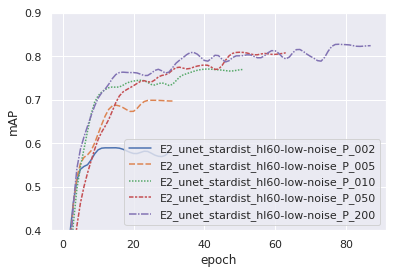

In [5]:
model_dirs_E2_hl60 = [f for f in model_dirs if 'E2' in f and 'hl60' in f and '_P_' in f]
plot_map_over_epoch(get_results_df(model_dirs_E2_hl60))

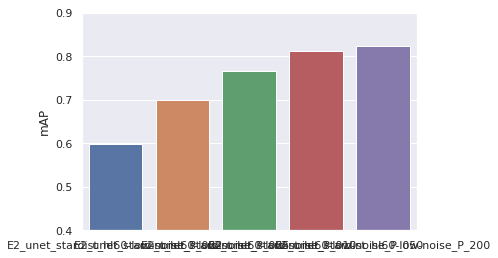

In [6]:
# TODO naming of bars
results_last = get_results_last(model_dirs_E2_hl60)
df = pd.DataFrame({n: [v] for n, v in results_last.items()})
ax = sns.barplot(data=df)
ax = ax.set(ylim=(0.4, 0.9), ylabel='mAP')
plt.show()